In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, BayesianRidge, Lars, ARDRegression
from sklearn.linear_model import TweedieRegressor, GammaRegressor, PoissonRegressor, SGDRegressor, RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [6]:
train = pd.read_csv('data/train.csv')

In [7]:
test = pd.read_csv('data/test.csv')

In [8]:
train.shape

(40455, 11)

In [11]:
def cleaner(df):
    colors = {'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H' : 2, 'I' : 1, 'J' : 0}
    clarity = {'SI2' : 1, 'VVS2' : 5, 'VS2' : 3, 'VS1' : 4, 'SI1' : 2, 'VVS1' : 6, 'IF' : 7, 'I1' : 0}
    cut = {'Premium' : 4, 'Ideal' : 3, 'Very Good' : 2, 'Fair' : 0, 'Good' : 1}
    df['color'] = np.vectorize(colors.get)(df.color)
    df.clarity = np.vectorize(clarity.get)(df.clarity)
    df.cut = np.vectorize(cut.get)(df.cut)
    return df
    

In [12]:
train = cleaner(train)

In [13]:
test= cleaner(test)

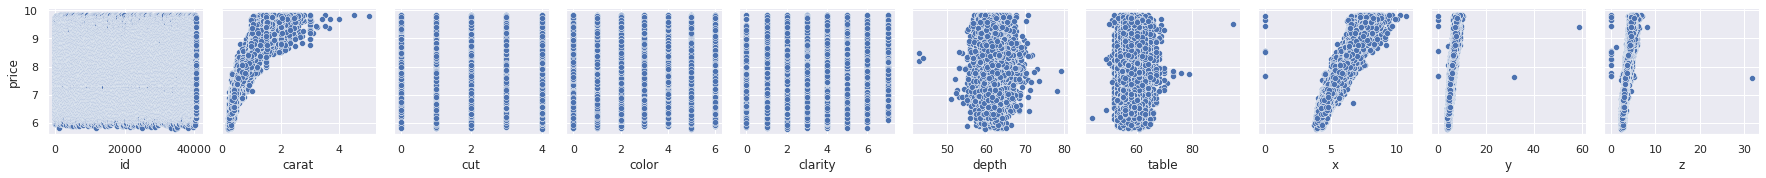

In [10]:
sns.set(rc={'figure.figsize':(20,10)})
sns.pairplot(data=train, y_vars='price', x_vars=train.drop(columns='price'))

In [14]:
X_train = train.drop(columns='price')

In [15]:
y_train = train.price

In [16]:
X_test = test

In [14]:
(-cross_val_score(LinearRegression(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.19482915593862582

In [15]:
(-cross_val_score(Ridge(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.19487409034086575

In [16]:
(-cross_val_score(Lasso(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.9357041196425879

In [17]:
(-cross_val_score(ElasticNet(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.6140638189561545

In [18]:
(-cross_val_score(LinearSVR(), preprocessing.normalize(X_train), y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

1.0183614809921582

In [19]:
(-cross_val_score(GradientBoostingRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.10781965161878095

In [20]:
(-cross_val_score(KNeighborsRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

1.1029765625301635

In [21]:
(-cross_val_score(RandomForestRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.09399938503441657

In [22]:
(-cross_val_score(Lars(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.1948291559386279

In [23]:
(-cross_val_score(LassoLars(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

1.0168296960546845

In [24]:
(-cross_val_score(ARDRegression(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.19480034674686203

In [25]:
(-cross_val_score(TweedieRegressor(), preprocessing.normalize(X_train), y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

1.0168297328662226

In [26]:
(-cross_val_score(GammaRegressor(), preprocessing.normalize(X_train), y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

1.0168296960546845

In [27]:
(-cross_val_score(PoissonRegressor(), preprocessing.normalize(X_train), y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

1.0168296027577306

In [28]:
(-cross_val_score(SGDRegressor(max_iter=5000,learning_rate='adaptive'), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

193622597125807.22

In [32]:
(-cross_val_score(RANSACRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.32206137754612973

In [50]:
(-cross_val_score(RandomForestRegressor(), PolynomialFeatures().fit_transform(X_train), y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.09289653150477162

In [20]:
(-cross_val_score(MLPRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

6.963039477427246

In [48]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, (-cv_results.mean())**0.5, cv_results.std())
    print(msg)

ScaledLR: 0.197421 (0.009898)
ScaledLASSO: 1.016843 (0.013583)
ScaledEN: 0.643665 (0.006682)
ScaledKNN: 0.155698 (0.001848)
ScaledCART: 0.129790 (0.001612)
ScaledGBM: 0.107997 (0.000424)


In [41]:
n_estimators=[200,250,300]

max_depth = [20]

min_samples_split=[10]

max_features=['auto']

bootstrap=[True]

In [42]:
random_grid={'n_estimators': n_estimators,
             'min_samples_split': min_samples_split,
             'max_depth': max_depth, 
             'max_features': max_features,
             'bootstrap': bootstrap}

In [44]:
rfr_random2=RandomizedSearchCV(estimator=RandomForestRegressor(),                    # modelo
                             param_distributions=random_grid,   # dictio de hiperparametros
                             n_iter=3,                          # iteraciones
                             cv=4,                              # cross-validation
                             verbose=1,                         # que me de feedback
                             n_jobs=-1,                         # -1 es todos los nucleos
                             scoring='neg_root_mean_squared_error'                       # metrica de error
                             )

In [45]:
rfr_random2.fit(PolynomialFeatures().fit_transform(X_train),y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True], 'max_depth': [20],
                                        'max_features': ['auto'],
                                        'min_samples_split': [10],
                                        'n_estimators': [200, 250, 300]},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [46]:
rfr_random2.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=250)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=250)

In [24]:
(-cross_val_score(rfr_random.best_estimator_, X_train, y_train, scoring='neg_mean_squared_error', cv=6)).mean() ** 0.5

0.09406652230014055

In [25]:
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

In [48]:
20,10,100

(20, 10, 100)

In [20]:
rfr = RandomForestRegressor(min_samples_split = 30)

In [21]:
rfr.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=30)

In [23]:
send2 = pd.DataFrame(rfr.predict(test)).rename(columns={0:'price'})
csv = send2.rename(columns={0:'price'})
csv.index.name='id'
csv.to_csv('test2_lin_reg.csv')

In [50]:
params = {
     'n_estimators': [400, 600,800]
}

In [52]:
rand = RandomizedSearchCV(RandomForestRegressor(),params, verbose=3)
# entreno el grid con los datos de train
rand.fit(X_train,y_train)

/home/diego/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..................n_estimators=400;, score=0.990 total time=  52.6s


KeyboardInterrupt: 

In [ ]:
grid = GridSearchCV(RandomForestRegressor(), params, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [36]:
send = pd.DataFrame(lr.predict(test))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 10)

In [32]:
csv = send.rename(columns={0:'price'})

In [33]:
csv.index.name='id'

In [36]:
csv.to_csv('test1_lin_reg.csv')

In [33]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
y = y_train
X = X_train
# Always scale the input. The most convenient way is to use a pipeline.
reg = SGDRegressor(max_iter=5000, tol=1e-3)
reg.fit(X, y)


SGDRegressor(max_iter=5000)

In [35]:
cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()

-4.8842570562453887e+33

In [109]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [19]:
reg.predict(X_train)[:5]

array([ 1.01604284e+12, -2.44447511e+12,  4.82059318e+12,  5.15536695e+12,
        8.07264111e+12])

In [53]:
def drop_corr(df):
    super_cor = df.corr()[((df.corr() >= 0.9)|(df.corr() <= -0.9))&(df.corr() != 1)].where(np.triu(np.ones(df.corr().shape)).astype(bool)).any()
    df_dropped = df.drop(columns=super_cor[super_cor==True].index)
    return df

In [54]:
X_train_dropped = drop_corr(X_train)

In [55]:
X_test_dropped = drop_corr(test)

In [56]:
X_test_dropped.shape, X_train_dropped.shape

((13485, 10), (40455, 10))

In [27]:
lr.fit(X_train_dropped,y_train)

LinearRegression()

In [68]:
score = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5).mean()

In [69]:
score

0.9631989522809998

In [57]:
lr.predict(X_test_dropped)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 10)